> Created on Wed Mar 27 20:33:48 2019 @author: Richie Bao-caDesign设计(cadesign.cn) __+updated on Wed Nov 25 23:31:32 2020 by Richie Bao

## 1.城市生活圈，DBSCAN连续距离聚类，卡方分布及独立性检验，协方差估计，
比尔·希利尔提出“空间”是物质形态和社会经济活动相互作用的媒介物：社会经济活动不仅具有空间性，即社会经济活动的展开依赖其在空间上的分布，而且它们的空间组织形式受制于空间自身的规律。凯文·林奇认为物质环境的变化对社会只有微小的影响，正如社会变革（即使是革命）对城市空间也只产生非直接的影响一样。社会结构和物质空间形态之间有着内在的关系，它们通过其中的变量长期地相互作用着，也就是通过人的行动与态度相互作用着。城市的物质空间形态和社会行为的发展是彼此相互依赖，长期渐进式、小规模变化、无序的，逐渐的调整、优化积累的结果。

在社会经济活动方面，日本在《农村生活环境整备计划》中提出生活圈概念，即是指某一特定地理、社会村落范围内人们日常生产、生活的诸多活动在地理平面上的分布，以一定人口的村落、一定距离圈域作为基础，将生活圈按照村落-大字-旧村-市町村-地方都市圈进行层次划分。自日本提出“生活圈”概念以来，国内就城市发展逐渐从大尺度的宏观叙事转向小尺度的空间调整，将居民视为均质整体转向关注不同社会群体的多元需求， 逐渐开始关注城市生活空间的构建与居民生活质量的提升。国内的相关研究也在持续展开，涉及生活圈规划方法和策略，生活圈的界定与测度，以及多个城市15分钟生活圈的划定与空间优化等。当前的研究多以规划理念、策略居多，定量分析上通常位于一个固定的时间距离下分析一个或多个目标位置范围下的居民日常活动，如出行路径和范围、以及服务设施的空间布局结构等。

从单纯的关注物质空间开始转向考虑其背后的社会属性，以生活圈作为切入点来考虑城市微更新等提升居民生活品质需求的规划策略，为达到具体落实的目的，有必要量化生活圈的空间分布，社会属性的空间结构，以及动态的连续时间距离层级变化关系，从而使得生活圈规划中涉及到的人文关怀、活力环境以及宜人的绿色休闲网络等内容得以合理布局，落实到发挥其最大价值的区域内。

### 1.1 DBSCAN，Affinity Propagation（AP）聚类算法
#### 1.1.1 DBSCAN聚类算法

在聚类部分，详细阐述了K-Means算法，K-Means的参数输入需要确定分组的数量，但是要将兴趣点(points of interest,POI)数据点按照地理空间分布的距离进行聚类，不能确定分组的数量，则K-Means算法无法实现该需求。分析POI空间分布，则使用DBSCAN（Density-Based Spatial Clustering of Applications with Noise.）聚类分析。该算法的实现在Python程序设计语言机器学习开源库scikit-learn的sklearn.cluster类中，`class sklearn.cluster.DBSCAN(eps,min_samples,*)`，其关键参数设置中eps为设置采样点之间的最大距离；min_samples为设置邻域样本数量（含自身）。

DBSCAN可以解决K-Means,MeanShift,AffinityPropagation,MiniBatchKMeans,GaussianMixture等算法失败的非凸问题（参看Sklearn官网聚类部分提供的不同聚类算法比较代码结果图示中双弯月一行）。DBSCAN算法的主要思想是，一个簇是一个被低密度区域包围的高密度区域（其形状没有限制），不需要预先给定预期簇的数量。这个过程主要基于一个度量函数（通常是欧氏距离，即eps）和一个半径（理解为邻域样本的数量）。给定一个样本$x_{i} $，观察其周边样本，如果它被至少$n_{min}$个点包围，则其成为一个核心点：$N(d( \overline{ x_{i} },\overline{ x_{j} } ) \leq  \epsilon ) \geq  n_{min} $。如果$d( \overline{ x_{i} },\overline{ x_{j} } ) \leq  \epsilon$，则一个样本$ x_{j}$被定义为接近核心点$ x_{i}$。以此类推，对于一个可形成簇的点的序列，如果$x_{i}  \mapsto x_{i+1}  \mapsto  \ldots  \mapsto x_{j} $，各个点逐一连续靠近，则$x_{i} $和$x_{i} $被认为是可达的，即包含在同一簇中。进一步讲，如果给定一个样本$x_{k} $，如果$x_{i} $和$x_{j} $都靠近$x_{k} $，则它们是可达的，紧密靠近的。如果对于所有样本不满足上述要求则认定为是噪音。

对于满足距离(eps)要求没有几何结构限制的样本点归为一个簇，同时，如果临近的簇靠近这个簇，有样本满足距离要求，则这两个簇可以合并为一个簇，否则是拓扑分离的。当扫描完所有区域后，在所有簇之间也有可能有单独的点，即噪音点，不能满足距离要求下划分到任何簇中。

比较DBSCAN和K-Means算法聚类非凸几何结构的数据集，DBSCAN具有较好的表现。

>  参考文献</br>
> 1. Giuseppe Bonaccorso.Mastering Machine Learning Algorithms: Expert techniques for implementing popular machine learning algorithms, fine-tuning your models, and understanding how they work[M].Birmingham:Packt Publishing.January, 2020.

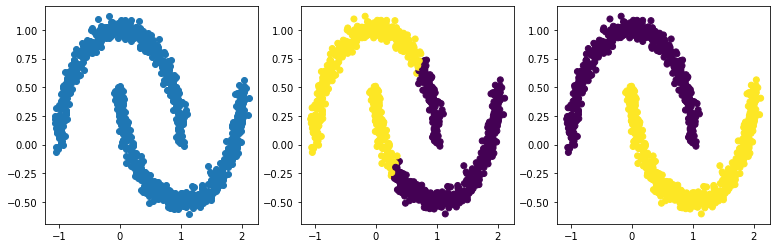

In [19]:
from sklearn.datasets import make_moons
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

nb_samples=1000
X,y=make_moons(n_samples=nb_samples, noise=0.05)

fig, axs=plt.subplots(1,3,figsize=(26/2,8/2))
axs[0].scatter(X[:, 0], X[:, 1])

#K-Means聚类
clustering_KMeans=cluster.KMeans(n_clusters=2).fit(X)
pred_KMeans=clustering_KMeans.predict(X)
axs[1].scatter(X[:, 0], X[:, 1],c=pred_KMeans)

#DBSCAN聚类
clustering_DBSCAN=cluster.DBSCAN(eps=0.3,min_samples=20).fit(X)
pred_DBSCAN=clustering_DBSCAN.labels_.astype(np.int)
axs[2].scatter(X[:, 0], X[:, 1],c=pred_DBSCAN)

plt.show()

#### 1.1.2 Affinity Propagation（AP）聚类算法
AP聚类适合高维、多类数据快速聚类，聚类性能和效率有大幅度提升。其基本思想是将全部样本看作网络的节点，通过网络中各边的消息传递计算各样本的聚类中心。传递的消息包括吸引度（responsibility）和归属度（availability）。AP算法通过迭代过程不断更新每一个点的吸引度和归属度，直到产生$m$个高质量的聚类中心（Exempla），同时将其余的数据点分配到相应的聚类中。AP算法不需指定聚类数量，相对其它算法，其误差平方和相对较低。在POI的空间结构分析中，使用该算法聚类行业列表与DBSCAN聚类簇的列联表，从而能够得出行业类之间的相关性。

### 1.2 卡方分布与独立性检验
#### 1.2.1 卡方分布(Chi-Square Distribution,χ²-distribution)
若k个随机变量$Z_{1} , \ldots  \ldots ,Z_{k}$，是相互独立，符合标准正态分布的随机变量（数学期望为0，方差为1），则随机变量$Z$的平方和$X= \sum_{i=1}^k   x_{i} ^{2}$被称为服从自由度为$k$的卡方分布，记作$X \sim  x^{2} (k)$或$X \sim   x_{k} ^{2} $。卡方分布的概率密度函数（即计算卡方分布曲线的公式）为：$f_{k} (x)= \frac{  \frac{1}{2} ^{ \frac{k}{2} } }{ \Gamma ( \frac{k}{2} )}  x^{ \frac{k}{2}-1 } e^{ \frac{-x}{2} }  $，其中$x \geq 0$，当$x  \leq 0$时$f_{k} (x)=0$。$\Gamma $代表Gamma函数。在python中绘制卡方分布，仍旧与正态分布、t分布一样，直接由SciPy库完成。

因为卡方分布表述的是多个事件（随机变量）的机率，每个事件符合标准正态分布，而标准正态分布表为记录对应横轴刻度的机率表，卡方分布表则是记录对应几率的横轴刻度表。

对于卡方分布的理解，可以结合比较均值抽样分布（于标准误部分阐述），二者具有类似的逻辑。即可以表述为从同一总体中抽取相同容量样本平方和的分布，假设从服从平均值为30，标准差为5的正态分布中，随机提取2000个样本（事件，或随机变量，即$Z_{k}$），各个样本的容量为1000，计算每一样本的平方和，观察这2000个样本的卡方分布情况。从下述实验打印结果来看，$x^{2}$趋近服从自由度为$(2000-1)$的$x^{2}$分布。即可以通过一个检验统计量（平方和）来比较期望结果和实际结果之间的差别，然后得出观察频数极值的发生概率。因此以特定概率分布为某种情况建模时，事件长期结果较为稳定，能够清晰进行把握。但是如果期望与事实存在差异时，则可以应用卡方分布判断偏差是正常的小幅度波动还是建模上的错误。一是，可以检验一组给定数据与指定分布的吻合程度；二是，可以检验两个变量的独立性，即变量之间是否存在某种关系。

* $\Gamma $函数

在数学中，$\Gamma $函数，也称为伽马函数(Gamma函数)，是阶乘函数在实数与复数域上的扩展。如果$n$为正整数，则：$\Gamma (n)=(n-1)!$，即正整数的阶乘；对于实数部分为正的复数$z$，伽马函数定义为：$\Gamma (z)= \int_0^ \infty   t^{z-1} e^{-t} dt$。发现$\Gamma $函数的起因是数列插值问题，即找到一个光滑的曲线连接那些由$y=(x-1)!$所给定的点$(x,y)$，并要求$x$为正整数。但是如果$x$由正整数拓展到实数，即可以计算$2!,3!, \ldots ,$，那么是否可以计算$2.5！$，并绘制$(n,n!)$的平滑曲线？而$\Gamma $函数正是借由微积分的积分与极限表达阶乘。

伽马(Gamma)分布，假设$X_{1} ,X_{2}, \ldots ,X_{n}$为连续发生事件的等候时间，且这$n$次等侯时间为独立的，那么这$n$此等候时间之和$Y(Y=X_{1} ,X_{2}, \ldots ,X_{n})$服从伽马分布，即$Y \sim Gamma( \alpha , \beta )$,其中$\alpha =n, \beta = \gamma $，$\alpha$是伽马分布中的母数，称为形状参数，$\beta$为尺度参数。$\gamma$是连续发生事件的平均发生频率。指数分布是伽马分布$\alpha=1$的特殊情况。 

令$X \sim  \Gamma ( \alpha , \beta )$，且$\lambda = \beta $（即$X \sim  \Gamma ( \alpha ,  \gamma  )$），则伽马分布的概率密度函数为：$f(x)= \frac{ x^{a-1}  \gamma ^{a}   e^{- \gamma x} }{ \Gamma (a)} ,x>0$，其中伽马函数的特征为：$\begin{cases}  \Gamma (a)=(a-1)! & if\: a\: is\:  \mathbb{Z}^{+} \\\Gamma (a)=(a-1) \Gamma (a-1) & if\: a\: is\:  \mathbb{R}^{+} \\\ \Gamma ( \frac{1}{2}= \sqrt{ \pi }  ) \end{cases} $



> 参考文献</br>
> 1.Timothy C.Urdan.Statistics in Plain English(白话统计学)[M].中国人民大学出版社.2013,12.第3版.</br>
2.(日)高桥 信著,株式会社TREND-PRO漫画制作，陈刚译.漫画统计学[M].科学出版社.北京.</br>
3.Dawn Griffiths.Head First Statistics: A Brain-Friendly Guide[M].Sebastopol:O'Reilly Media.September, 2008 



C:\Users\richi\Anaconda3\envs\usda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

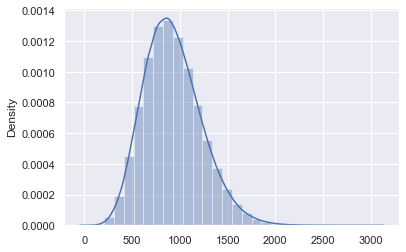

In [57]:
import numpy as np
from scipy import stats
import seaborn as sns
import math
sns.set()
mu,sigma=30,5
sample_size=1000
sample_square=np.array([np.square(np.random.normal(mu, sigma, sample_size)) for i in range(2000)]) #从服从平均值为30，标准差为5的正态分布中，随机提取2000个样本，每个样本容量为1000的样本，并计算每一样本的均值
bins=30
sns.distplot(sample_square,bins=bins) #查看2000个样本平方和的分布

使用SciPy库计算打印卡方分布及伽马分布

Chi_2_Check accuracy of cdf and ppf: True
Gamma_Check accuracy of cdf and ppf: True


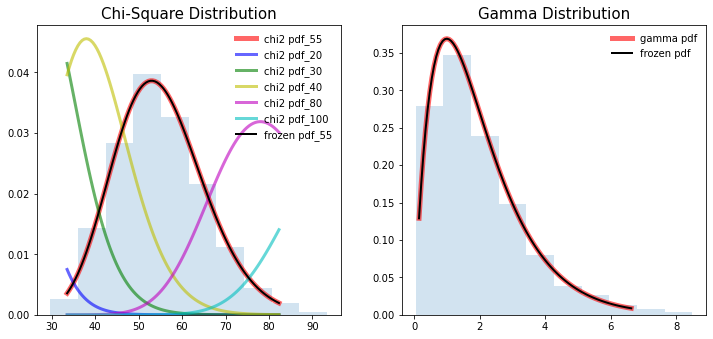

In [46]:
import matplotlib.pyplot as plt
from scipy.stats import chi2
import numpy as np

fig, axs=plt.subplots(1,2,figsize=(18/1.5,8/1.5)) 

#A-卡方分布
df=55
mean,var,skew,kurt=chi2.stats(df, moments='mvsk')
#打印卡方分布的概率密度函数 Display the probability density function (pdf)
x=np.linspace(chi2.ppf(0.01, df),chi2.ppf(0.99, df), 100)
axs[0].plot(x, chi2.pdf(x, df),'r-', lw=5, alpha=0.6, label='chi2 pdf_55')

df_lst=[20,30,40,80,100]
fmts=['b-','g-','y-','m-','c-']
for i in range(len(df_lst)):
    axs[0].plot(x, chi2.pdf(x, df_lst[i]),fmts[i], lw=3, alpha=0.6, label='chi2 pdf_%d'%df_lst[i])
    
#固定分布 Alternatively, freeze the distribution and display the frozen pdf
rv=chi2(df)
axs[0].plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf_55')

vals=chi2.ppf([0.001, 0.5, 0.999], df)
print("Chi_2_Check accuracy of cdf and ppf:",np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df)))

r=chi2.rvs(df, size=1000)
axs[0].hist(r, density=True, histtype='stepfilled', alpha=0.2)
axs[0].legend(loc='best', frameon=False)
               
#B-Gamma分布    
from scipy.stats import gamma
a=1.99323054838
mean_,var_,skew_,kurt_=gamma.stats(a, moments='mvsk')
#打印Gamma分布的概率密度函数 Display the probability density function (pdf):
x_= np.linspace(gamma.ppf(0.01, a),gamma.ppf(0.99, a), 100)
axs[1].plot(x_, gamma.pdf(x_, a),'r-', lw=5, alpha=0.6, label='gamma pdf')
#Alternatively, freeze the distribution and display the frozen pdf:
rv_= gamma(a)
axs[1].plot(x_, rv_.pdf(x_), 'k-', lw=2, label='frozen pdf')

vals = gamma.ppf([0.001, 0.5, 0.999], a)
print("Gamma_Check accuracy of cdf and ppf:",np.allclose([0.001, 0.5, 0.999], gamma.cdf(vals, a)))

r_=gamma.rvs(a, size=1000)
axs[1].hist(r_, density=True, histtype='stepfilled', alpha=0.2)
axs[1].legend(loc='best', frameon=False)

axs[0].set_title(r'Chi-Square Distribution', fontsize=15)
axs[1].set_title(r'Gamma Distribution', fontsize=15)
plt.show()               

#### 1.2.2 （卡方）独立性检验
卡方检验（Chi-Squared Test，或 $x^{2}$ Test）,是假设检验的一种,一种非参数假设检验，主要用于类别/分类变量（类别变量就是取值为离散值的变量，例如性别即为一个类别变量，有男女两类，又或者国籍、学科、植物等的类别等），在没有其他的限制条件或说明时，卡方检验一般指代的是皮尔森卡方(Pearson)检验。1900年，Pearson发表了著名的$x^{2}$检验的论文，假设实验中从总体随机取样得到的$n$个观察值被划分为$k$个互斥的分类中，这样每个分类都有一个对应实际的观察次数（或观测频数，observed frequencies）$ x_{i} (i=1,2, \ldots ,k)$。对实验中各个观察值落入第$i$个分类的概率$p_{i}$的分布提出零假设，获得对应所有第$i$分类的理论期望次数(或预期频数，expected frequencies)以及限制条件，$\sum_{i=1}^k  p_{i}  =1,and \: \sum_{i=1}^k  m_{i} =\sum_{i=1}^k  x_{i} =n$。在上述零假设成立以及$n$趋向$\infty $时，以下统计量的极限分布趋向$x^{2}$分布，$X^{2} = \sum_{i=1}^k  \frac{ ( x_{i} - m_{i} )^{2} }{m_{i}}  =\sum_{i=1}^k  \frac{ x_{i} ^{2} }{m_{i}} -n$。$X^{2}$值的计算公式通常表示为：$X^{2} =  \sum ( \frac{ (O-E)^{2} }{E} )$，其中，$O$为各个单元格（对列联表而言）的观测值（观测频数），$E$为各个单元格的预期值（预期频数）。零假设中所有分类的理论期望次数$m_{i}$均为足够大且已知的情况，同时假设各分类的实际观察次数$x_{i}$均服从正态分布，得出样本容量$n$足够大时，$x^{2}$趋近服从自由度为$(k-1)$的$x^{2}$分布。

通常将用于卡方检验的数据以表格的形式给出并依据表格进行计算，这个表格即为列联表(contingency tabel)。以*白话统计学*性别与专业的修订数据为例，


| 性别/专业      | 心理学 | 英语     |生物学 |行合计     |
| :---        |    :----:   |          ---: | ---: |---: |
| 男生      | 35       | 50  |15|100|
| 女生      | 30        | 25      |45|100|
| 列合计      | 65        | 75      |60|200|

利用表格每一单元格中的观测频数，以及行、列和整个样本的合计频数，计算每个单元格的预期频数。男女两行中每一单元格的预期值都相等，是因为样本中的男女生人数相等。并根据上述的$X^{2}$值的计算公式，计算$X^{2}$，其和为：0.19+0.19+4.17+4.17+7.5+7.5=23.72。

| 性别/专业      | 心理学 | 英语     |生物学 |
| :---        |    :----  |          :---| :--- |
| 男生      |    观测频数：35 </br>预期频数：$\frac{100 \times 65}{200} =32.5$ </br>$x^{2}$值：$ \frac{ (35-32.5)^{2} }{32.5} =0.19$   |观测频数：50 </br> 预期频数:$\frac{100 \times 75}{200} =37.5$</br> $x^{2}$值：$ \frac{ (50-37.5)^{2} }{37.5} =4.17$ |观测频数：15 </br> 预期频数: $\frac{100 \times 60}{200} =30$</br> $x^{2}$值：$ \frac{ (15-30)^{2} }{30} =7.5$ |
| 女生      | 观测频数：30 </br>预期频数 $\frac{100 \times 65}{200} =32.5$ </br>$x^{2}$值：$ \frac{ (30-32.5)^{2} }{32.5} =0.19$    |观测频数：25 </br> 预期频数:  $\frac{100 \times 75}{200} =37.5$ </br>$x^{2}$值：$ \frac{ (25-37.5)^{2} }{37.5} =4.17$ | 观测频数：45 </br> 预期频数: $\frac{100 \times 60}{200} =30$</br>$x^{2}$值：$ \frac{ (45-30)^{2} }{30} =7.5$ |

注意到$x^{2}$值较大是因为男女生在选择英语或生物专业时存在相对较大的差异。而心理学专业的观测值和预期值之差相对较小，对整体$x^{2}$值的贡献不大。获得观测的$x^{2}$值，则需要查表（或程序）查找临界$x^{2}$值，其自由度$df=(R-1)(C-1)=(2-1)\times(3-1)=2$，使用SciPy的`chi2.ppf(q=1-0.05,df=2)`计算可得0.05的$\alpha $水平，自由度为2的条件下临界$x^{2}$值为5.99，而观测的$x^{2}$值为23.72，所以可以得出结论，男女生在专业选择上存在统计显著的差异。而因为观测的$x^{2}$值足够大，在0.001的显著性水平上`chi2.ppf(q=1-0.001,df=2)`(临界值为13.815510557964274)，也是统计显著的（即$p<0.001$）。

In [66]:
print("𝑝<0.05,df=2,Chi-Squared=%.3f"%chi2.ppf(q=1-0.05,df=2))
print("𝑝<0.001,df=2,Chi-Squared=%.3f"%chi2.ppf(q=1-0.001,df=2))

𝑝<0.05,df=2,Chi-Squared=5.991
𝑝<0.001,df=2,Chi-Squared=13.816


使用SciPy的`chi2_contingency`方法计算列联表，其计算结果与手工计算结果保持一致。

In [111]:
from scipy.stats import chi2_contingency
import numpy as np
schoolboy=(35,50,15)
schoolgirl=(30,25,45)
statistical_data=np.array([schoolboy,schoolgirl])
chi2_results=chi2_contingency(statistical_data)
print("卡方值：%.3f \n P值：%.10f \n 自由度:%d \n 对应预期频数（期望值）：\n %s"%chi2_results)

卡方值：23.718 
 P值：0.0000070748 
 自由度:2 
 对应预期频数（期望值）：
 [[32.5 37.5 30. ]
 [32.5 37.5 30. ]]


#### 1.2.3 协方差估计(Covariance Estimators)
统计学上常用的统计量包括平均值、方差、标准差等。平均值描述了样本集合的中间点；方差描述了一组数据与其平均值的偏离程度，方差越小，数据越集中，方差越大，数据越离散；标准差描述了样本集中各个样本点到均值的距离的平均值，同方差，描述数据集的集聚离散程度。这些统计统计量是针对一维数组，到处理高维时，用到协方差，度量多个随机变量关系的统计量，结果均为正则正相关，都为负则负相关，均趋近于0，则不相关。协方差是计算不同特征之间的统计量，不是不同样本之间的统计量。同时，协方差的大小，除了和变量之间的相关程度有关，也与变量本身的方差大小有关，因此引入相关系数，移除变量本身的影响。在协方差计算时可以使用协方差（矩阵）计算公式（查看方差和协方差部分），而有时并不使用全部的样本数据计算协方差矩阵，而是利用部分样本数据计算，这是就需要考虑样本计算得到的协方差矩阵是否和总体的协方差矩阵相同和近似。大多数情况下，估计总体的协方差矩阵必须在样本的性质（大小size，结构structure，同质性homogeneity）对估计质量有很大影响下进行，在`sklearn.covariance`模块中则提供了多个健壮的协方差估计算法，引列表如下：

| 协方差估计方法                                        | 解释                                                                     |
|------------------------------------------------|------------------------------------------------------------------------|
| covariance.EmpiricalCovariance(*[, …])         | 最大似然协方差估计 Maximum likelihood covariance estimator                                |
| covariance.EllipticEnvelope(*[, …])            | 用于检测高斯分布数据集中异常值的对象 An object for detecting outliers in a Gaussian distributed dataset.    |
| covariance.GraphicalLasso([alpha, mode, …])    | 带L1惩罚估计量的稀疏逆协方差估计 Sparse inverse covariance estimation with an l1-penalized estimator.   |
| covariance.GraphicalLassoCV(*[, alphas, …])    | 稀疏逆协方差w/交叉验证l1惩罚的选择 Sparse inverse covariance w/ cross-validated choice of the l1 penalty. |
| covariance.LedoitWolf(*[, store_precision, …]) |LedoitWolf估计量  LedoitWolf Estimator                                                   |
| covariance.MinCovDet(*[, store_precision, …])  |最小协方差行列式(MCD):协方差的稳健估计  Minimum Covariance Determinant (MCD): robust estimator of covariance.  |
| covariance.OAS(*[, store_precision, …])        |Oracle逼近收缩估计  Oracle Approximating Shrinkage Estimator                               |
| covariance.ShrunkCovariance(*[, …])            |协方差缩水（shrinkage）估计 Covariance estimator with shrinkage                                    |
| covariance.empirical_covariance(X, *[, …])     |计算最大似然协方差估计量 Computes the Maximum likelihood covariance estimator                   |
| covariance.graphical_lasso(emp_cov, alpha, *)  | l1-惩罚项协方差估计量 l1-penalized covariance estimator                                      |
| covariance.ledoit_wolf(X, *[, …])              | 估计缩水的Ledoit-Wolf协方差矩阵 Estimates the shrunk Ledoit-Wolf covariance matrix.                    |
| covariance.oas(X, *[, assume_centered])        |用Oracle近似缩水算法估计协方差 Estimate covariance with the Oracle Approximating Shrinkage algorithm. |
| covariance.shrunk_covariance(emp_cov[, …])     |计算在对角线上缩水的协方差矩阵 Calculates a covariance matrix shrunk on the diagonal                  |

下述假设了一个协方差矩阵，并根据该协方差矩阵生产一组数据集，分布使用了`sklearn.covariance `提供的GraphicalLassoCV，EmpiricalCovariance，MinCovDet，以及numpy库提供的np.cov()方法进行计算比较观察，其结果相近，向真实假设的协方差矩阵值靠近。

In [11]:
import numpy as np
from sklearn.covariance import GraphicalLassoCV,EmpiricalCovariance,MinCovDet
#假设的协方差矩阵，包含4个特征量
true_cov=np.array([[0.8, 0.0, 0.2, 0.0],
                  [0.0, 0.4, 0.0, 0.0],
                  [0.2, 0.0, 0.3, 0.1],
                  [0.0, 0.0, 0.1, 0.7]])
np.random.seed(0)
#生成满足假设协方差矩阵的特征值
X = np.random.multivariate_normal(mean=[0, 0, 0, 0], cov=true_cov,size=200)
#A-使用GraphicalLassoCV方法
print("A-GraphicalLassoCV algorithm:\n{},estimated location(the estimated mean):{}".format(np.around(GraphicalLassoCV().fit(X).covariance_, decimals=3),np.around(cov.location_, decimals=3)))

#B-EmpiricalCovariance
print("A-EmpiricalCovariance algorithm:\n{}".format(np.around(EmpiricalCovariance().fit(X).covariance_, decimals=3)))

#C-MinCovDet
print("A-MinCovDet:\n{}".format(np.around(MinCovDet().fit(X).covariance_, decimals=3)))

#D-np.cov
print("A-np.cov:\n{}".format(np.around(np.cov(X.T), decimals=3)))

A-GraphicalLassoCV algorithm:
[[0.816 0.051 0.22  0.017]
 [0.051 0.364 0.018 0.036]
 [0.22  0.018 0.322 0.094]
 [0.017 0.036 0.094 0.69 ]],estimated location(the estimated mean):[0.073 0.04  0.038 0.143]
A-EmpiricalCovariance algorithm:
[[0.816 0.059 0.228 0.009]
 [0.059 0.364 0.025 0.044]
 [0.228 0.025 0.322 0.103]
 [0.009 0.044 0.103 0.69 ]]
A-MinCovDet:
[[ 0.741 -0.005  0.162  0.089]
 [-0.005  0.305  0.024  0.061]
 [ 0.162  0.024  0.237  0.117]
 [ 0.089  0.061  0.117  0.55 ]]
A-np.cov:
[[0.82  0.059 0.229 0.009]
 [0.059 0.366 0.025 0.044]
 [0.229 0.025 0.324 0.103]
 [0.009 0.044 0.103 0.694]]


### 1.3 基于百度POI连续距离聚类层级下城市生活圈的空间分布结构
#### 1.3.1 连续距离聚类与业态分布结构计算
POI空间分布结构的分析包括三部分的内容，一个是，基于POI位置信息研究城市生活圈的空间层级变化特征；另一个是，基于POI一级行业分类，研究城市生活圈的业态结构；再者，通过信息熵和均衡度分析生活圈行业类出现的均质性。

1. 对于城市生活圈的空间层级变化特征的研究是给定连续聚类的距离eps=list(range(20,520,10)) =[ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400,410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510]，应用DBSCAN聚类方法分析每一层级下POI集聚分布的情况，聚类50个距离层级之后，通过分别绘制POI独立点、聚类总数与聚类距离之间的折线图，利用python库kneed计算曲线拐点对应的距离值，观察层级数据变化并捕捉连续层级变化过程中的关键层级，分析该距离层级下生活圈空间分布的特点。同时，绘制聚类频数与聚类距离关系的箱型图，寻找连续层级变化下的最大频数出现的位置所对应的距离，找到基于POI城市最大生活圈的具体范围。

2. 对于业态结构，则参考官方Sklearn案例[Visualizing the stock market structure](https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html#sphx-glr-auto-examples-applications-plot-stock-market-py)。因为POI位置的聚类，可以找到行业分布的空间特征，但是缺失类别标签，无法探究行业类别之间的关系，因此基于POI的一级行业分类，通过计算所有层级下各个生活圈行业类出现的相关性，探索功能需求之间的关联在连续层级下的变化。计算行业类所属聚类簇的频数， 采用covariance.GraphicalLassoCV( )协方差逆矩阵和affinity_propagation()AP聚类算法计算不同层级下生活圈所包含城市功能之间的关联程度。

3. 对于信息熵和均衡度分析，其信息熵公式为：$H=- \sum_{i=1}^N  P_{i}log  P_{i}$，其中$P_{i}$为簇中行业类频数占簇中POI总数的百分比；$i$为聚类簇的数量。信息熵的高低反映了城市行业类的均衡程度，熵值越高，表明不同行业类型越多，各类型的频数相差越小，行业类分布越均衡。当各类型的频数相等即$P_1=P_2=⋯=P_N=1/N$时，熵值达到最大，表明行业类达到了最大均衡状态。因为计算有50个层级，而每一层级聚类的各簇大小不同，所计算的信息熵缺乏可比性，因此计算实际熵值与最大熵值之比的均衡度$J$，公式为：$J= \frac{H}{ H_{m} } = -  \frac{ \sum_i^N log p_{i}  }{logN} $。均衡度越大，行业类出现的均质性越强；相反，均质性越弱，某一类则占有相对数量优势。


```mermaid
classDiagram

poi_空间结构包含功能 --> 建立数据集Bunch : a.POI读取并建立数据集

poi_空间结构包含功能 : a. 读取POI.json格式数据，并建立SklearnBunch数据集
poi_空间结构包含功能 : b. 类的实例化与数据初始化
poi_空间结构包含功能 : c. 执行连续距离DBCSCAN聚类
poi_空间结构包含功能 : d. 保持DBCSCAN聚类结果为shp格式地理信息数据并打印显示
poi_空间结构包含功能 : e. 行业类标与聚类簇的卡方独立性检验
poi_空间结构包含功能 : f. POI空间结构

建立数据集Bunch : 1.读取.json格式的POI数据
建立数据集Bunch : 2.建立Sklearn下的Bunch数据集
建立数据集Bunch : poi_json2sklearn_bunch(fps)

建立数据集Bunch --> 类 poi_spatial_distribution_structure: b.类实例化与数据初始化
类 poi_spatial_distribution_structure : __init__(self,poi_dataBunch,eps,min_samples,save_path)
类 poi_spatial_distribution_structure : frequency_array(slef,array)
类 poi_spatial_distribution_structure : clustering_DBSCAN(self,eps_single)
类 poi_spatial_distribution_structure : clustering_batch_computing(self)
类 poi_spatial_distribution_structure : poi2shp(self)
类 poi_spatial_distribution_structure : poi_chi_2Test(self)
类 poi_spatial_distribution_structure : POI_structure(self)

poi_空间结构包含功能 --> 连续距离DBCSCAN聚类 : c.BCSCAN聚类
连续距离DBCSCAN聚类 : 根据聚类距离批量DBSCAN聚类
连续距离DBCSCAN聚类 : 单次DBSCAN聚类
连续距离DBCSCAN聚类 : clustering_batch_computing(self)
连续距离DBCSCAN聚类 : clustering_DBSCAN(self,eps_single)
连续距离DBCSCAN聚类 --|> 类 poi_spatial_distribution_structure :c

poi_空间结构包含功能 --> DBCSCAN聚类结果保存为shp : d.DBCSCAN聚类保存
DBCSCAN聚类结果保存为shp : 距离聚类保存
DBCSCAN聚类结果保存为shp : 打印图像
DBCSCAN聚类结果保存为shp : poi2shp(self)
DBCSCAN聚类结果保存为shp --|> 类 poi_spatial_distribution_structure :d

poi_空间结构包含功能 --> 卡方独立性检验 :e.卡方独立性检验
卡方独立性检验 : 建立列联表
卡方独立性检验 : 卡方独立性检验
卡方独立性检验 : poi_chi_2Test(self)
卡方独立性检验  --|> 类 poi_spatial_distribution_structure :e

poi_空间结构包含功能 --> POI空间结构 : f.POI空间结构
POI空间结构 : GraphicalLassoCV协方差计算
POI空间结构 : affinity_propagation聚类协方差
POI空间结构 : 图表打印与单独保存
POI空间结构 : POI_structure(self)
POI空间结构  --|> 类 poi_spatial_distribution_structure :f
```

在POI部分阐述了数据爬取的方法，并将数据分别存储为.csv和.json两种数据格式。此处读取已经保存的.json数据格式的POI，提取经纬度信息('location')和分类信息('tag')，并将其保存为sklearn的Bunch数据格式。

In [109]:
import util
import os

def poi_json2sklearn_bunch(fps,save_path):
    import json
    from sklearn.preprocessing import LabelEncoder
    from sklearn.datasets import base
    import numpy as np
    import pickle 
    '''
    function - 提取分析所需数据，并转换为skleran的bunch存储方式，统一格式，方便读取。(注意poi行业分类类标的设置)
    
    Paras:
    fps - .json文件列表
    '''
    poi_info=[]
    KeyError_count=0
    for fn in fps:
        with open(fn,'r') as f:
            json_decodes=json.load(f)
        for info in json_decodes:          
            try:
                poi_info.append((info['location']['lat'],info['location']['lng'],info['detail_info']['tag']))
            except KeyError: #有些数据中不包含'tag'信息，即没有该字典的键
                KeyError_count+=1   
  
    print("Oops! KeyError_count:%d"%KeyError_count)
    poi_coordi=np.array([(v[0],v[1]) for v in poi_info])  #经纬度信息
    poi_classification=[v[2].split(';') for v in poi_info]
    poi_classifi_firstLevle=np.array([v[0] for v in poi_classification])  #一级分类信息
    poi_classifi_secondLevle=np.array([v[1] if len(v)>1 else 'None' for v in poi_classification ])  #二级分类信息，处理可能不存在二级分类名的情况
     
    class_label=LabelEncoder()  #以整数形式编码分类名
    poiLabel_1=class_label.fit_transform(poi_classifi_firstLevle)    
    poiLabel_1_mapping=[(idx,label) for idx,label in enumerate(class_label.classes_)]  #建立一级分类名和整数编码的映射列表
    
    poiLabel_2=class_label.fit_transform(poi_classifi_secondLevle)
    poiLabel_2_mapping=[(idx,label) for idx,label in enumerate(class_label.classes_)]  #建立二级分类名和整数编码的映射列表

    data=poi_coordi
    target=np.stack((poiLabel_1,poiLabel_2),axis=-1)
    target_names={'1_level_label':poiLabel_1_mapping,'2_level_label':poiLabel_2_mapping}
    dataBunch=base.Bunch(DESCR=r'spatial points datasets of poi',data=data,feature_names=["XCoordinate","yCoordinate"],target=target,target_names=target_names)  #建立sklearn的数据存储格式bunch
    
    with open(os.path.join(save_path,'POI_dataset_bunch.pkl'),'wb') as f:
        pickle.dump(dataBunch,f)     
    return dataBunch

dirpath='./data/xianPOI_36/'
fileType=["json"]
poi_paths=util.filePath_extraction(dirpath,fileType)

'''展平列表函数'''
flatten_lst=lambda lst: [m for n_lst in lst for m in flatten_lst(n_lst)] if type(lst) is list else [lst]
poi_fp=flatten_lst([[os.path.join(key,val) for val in poi_paths[key]] for key in poi_paths.keys()])

save_path=r'./data/poi_clustering'
poi_dataBunch=poi_json2sklearn_bunch(poi_fp,save_path)    

Oops! KeyError_count:17


将连续距离聚类计算与业态结构的分析封装在`poi_spatial_distribution_structure`类下，具体类下函数之间的关系可以参考代码的结构图。其中需要注意函数之间变量调用的关系，尽可能让代码结构清晰易读；同时为避免重复计算，必要的结果数据需要保存在硬盘空间下，方便之后的分析加以读取调用。对于业态结构的计算是将聚类的结果即每个POI点对应的簇类标，以及一级行业分类对应起来建立列联表，其横向为行业类所属聚类簇频数，纵向为行业分类。对列联表计算协方差能够得知行业（一级）分类与聚类簇的关联程度，例如对于一个距离层级，形成有多个簇，每个簇中通常会包含多个行业分类的点，不同分类点占据的比例不同（即频数不同），那么哪些分类的组合容易形成一个簇？或者形成的簇更容易出现哪些行业分类的组合？获得了反应分类间相关性的协方差矩阵，可以对其执行聚类，相关性强的行业分类会聚集在一起，形成多个行业组合的簇，从而能够确定哪个行业分类与哪个更容易出现在一个区域中（簇）。

对协方差矩阵执行了卡方独立性检验，从下述结果中分析得到聚类距离90m及小于90m的所有聚类的结果因为其$p$值大于0.05，即在这些层级之下，无法确定行业一级分类对聚类簇的影响。大于90m的聚类，因为$p<0.05$，因此可以确定行业分类的不同组合对簇的形成有关联。因此大于90m的聚类，其行业业态的结构分析结果是有意义的。

100%|██████████| 50/50 [00:50<00:00,  1.01s/it]


完成连续距离聚类计算！
A-连续距离聚类结果保存为.shp格式数据，及打印一组预览


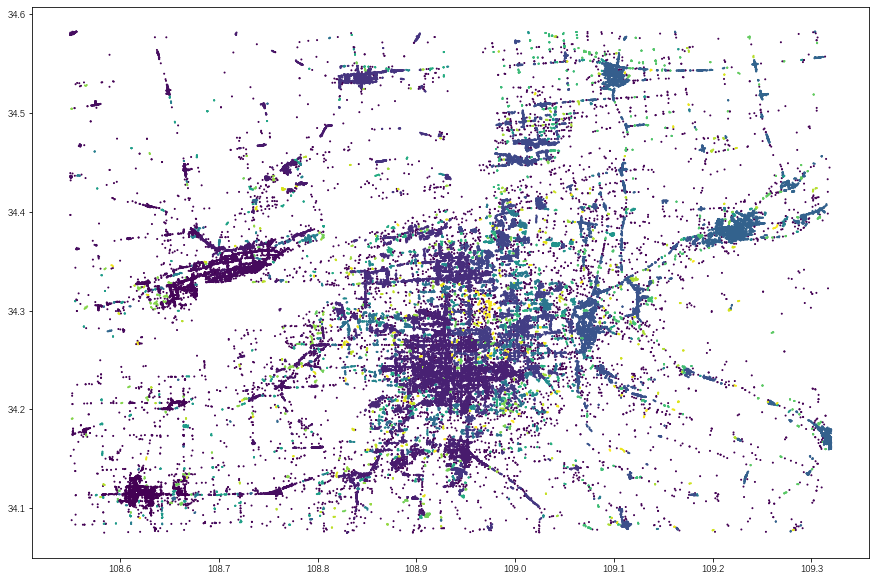

In [189]:
class poi_spatial_distribution_structure:
    '''
    function - 使用DBSCAN算法实现连续距离聚类和空间结构分析

    Paras:
    poi_dataBunch - 待聚类的数据，包括地理空间点坐标，类标，以及类标映射
    eps - 聚类距离
    min_samples - 邻域样本数量
    '''
    def __init__(self,poi_dataBunch,eps,min_samples,save_path):        
        self.data_degree=poi_dataBunch.data
        self.data_dist=poi_dataBunch.data*(2 * math.pi * 6378137.0)/ 360 #如果读取的是度，将其转换为距离单位
        self.eps=eps
        self.min_samples=min_samples
        self.save_path=save_path           
        self.poi_label=poi_dataBunch.target[:,0]   
        self.label_1_mapping=poi_dataBunch.target_names["1_level_label"]       
        
    def frequency_array(slef,array):
        '''
        function - 打印数组频数
        
        Paras:
        array - 待统计数组
        '''
        unique, counts=np.unique(array, return_counts=True)
        print(np.asarray((unique, counts)).T)        
    
    def clustering_DBSCAN(self,eps_single):
        import time
        from sklearn import cluster
        import numpy as np
        '''
        function - 单次聚类
        
        Paras:
        eps_single - 单次聚类距离
        '''
        db=cluster.DBSCAN(eps=eps_single,min_samples=self.min_samples,metric='euclidean') #meter=degree*(2 * math.pi * 6378137.0)/ 360  degree=50/(2 * math.pi * 6378137.0) * 360，在调参时，eps为邻域的距离阈值，而分析的数据为经纬度数据，为了便于调参，可依据上述公式可以在米和度之间互相转换，此时设置eps=0.0008，约为90m，如果poi的空间点之间距离在90m内则为一簇；min_samples为样本点要成为核心对象所需要的邻域样本数阈值。参数需要自行根据所分析的数据不断调试，直至达到较好聚类的结果。
        y_pred=db.fit_predict(self.data_dist)  #获取聚类预测类标

        return y_pred,np.unique(y_pred)          

    def clustering_batch_computing(self):
        from tqdm import tqdm 
        import numpy as np
        import pandas as pd
        '''
        function - 根据聚类距离列表批量处理（聚类）
        '''          
        global poi_clusteringPred_dict #存储聚类预测结果，配置为类的全局变量，避免重复计算   
        poi_clusteringPred_dict={}
        for eps_single in tqdm(self.eps):
            y_pred,pred_label=self.clustering_DBSCAN(eps_single)
            field_name=r'%s_POI'%eps_single #字符串格式化输出文件名
            poi_clusteringPred_dict[field_name]=y_pred   
        print("完成连续距离聚类计算！")
        
    def poi2shp(self):
        import os
        import geopandas as gpd
        from shapely.geometry import Point   
        import pandas as pd
        '''
        function - 保存聚类结果于.shp文件中,及打印一组预览
        
        Paras:
        poi_df - 包含地理坐标，和聚类预测值的DataFrame格式数据
        save_path - 保存的根目录
        '''
        print("A-连续距离聚类结果保存为.shp格式数据，及打印一组预览")
        save_fp=os.path.join(self.save_path,'poi_clustering_pred.shp')
        
        poi_clusteringPred_df=pd.DataFrame.from_dict(poi_clusteringPred_dict)
        poi_coordi_df=pd.DataFrame(self.data_degree,columns=('lat','lon'))     
        poi_concat_df=pd.concat([poi_coordi_df,poi_clusteringPred_df],axis=1)        
        
        poi_geoDF=poi_concat_df.copy(deep=True)
        poi_geoDF['geometry']=poi_geoDF.apply(lambda row:Point(row.lon,row.lat),axis=1) 
        crs={'init': 'epsg:4326'} #配置坐标系统，参考：https://spatialreference.org/  
        poi_gpd=gpd.GeoDataFrame(poi_geoDF,crs=crs)
        poi_gpd_clean=poi_gpd.dropna(subset=['lon','lat'])
        poi_gpd_clean.to_file(save_fp)
        poi_gpd_clean.plot(column=poi_gpd_clean.columns[15],markersize=1,figsize=(15,15))           
        
    def poi_chi_2Test(self):
        from scipy.stats import chi2_contingency
        import numpy as np        
        import pickle,os
        '''
        function - 卡方独立性检验，分析POI一级行业分类类标与聚类簇的相关性
        '''        
        global CT_dict
        CT_dict={}
        chi_2Test_dict={}
        for key in poi_clusteringPred_dict.keys():
            pred_label=np.hstack((poi_clusteringPred_dict[key].reshape(-1,1),self.poi_label.reshape(-1,1))) #水平组合聚类预测值和行业分类类标    
            label_pred=[]
            for i in range(len(np.array(self.label_1_mapping)[...,0])): #按行业类标重新组织数据，每行对应行业类标所有的聚类预测值
                label_pred.append(pred_label[pred_label[...,-1]==int(np.array(self.label_1_mapping)[...,0][i])])           
            label_cluster_frequency={}
            for p in label_pred:  #按行业类标计算每类所有点所属聚类簇的数量(频数)
                label_cluster_frequency[(p[...,-1][0])]=[(j,np.sum(p[...,0]==int(j))+1) for j in np.unique(poi_clusteringPred_dict[key]) if j!=-1] #独立性检验值不能为零，因此将所有值+1   
            CT_target=list(label_cluster_frequency.keys())
            CT_idx=np.array(list(label_cluster_frequency.values()))
            CT=CT_idx[...,1]  #建立用于独立性分析的列联表，横向为行业类所属聚类簇频数，纵向为行业类标
            CT_dict[key]=CT
            chi2_test=chi2_contingency(CT)  #列联表的卡方独立性检验  
            chi_squared_val, p, df,expected_frequencies=chi2_test #提取卡方值g，p值，自由度dof和与元数据数组同维度的对应理论值。此次实验计算p=0.00120633349692，小于0.05，因此行业分类与聚类簇相关。
            print("聚类距离：%s 卡方值：%.3f  P值：%.10f  自由度:%d"%(key,chi_squared_val, p, df))
            chi_2Test_dict[key]=chi2_test
        with open(os.path.join(self.save_path,'chi_2Test_dict.pkl'),'wb') as f:
            pickle.dump(chi_2Test_dict,f)
        with open(os.path.join(self.save_path,'POI_contingency_table.pkl'),'wb') as f:
            pickle.dump(CT_dict,f)    

    def POI_structure(self):
        from sklearn import cluster, covariance, manifold
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
        from matplotlib.collections import LineCollection
        from tqdm import tqdm
        
        from pylab import mpl
        mpl.rcParams['font.sans-serif']=['DengXian'] #解决中文字符乱码问题
        
        import warnings
        warnings.filterwarnings("ignore") #如果需要查看warning提示，需要注释掉该行
        '''
        function - POI一级行业分类的业态结构.参考官方案例Visualizing the stock market structure：http://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html#sphx-glr-auto-examples-applications-plot-stock-market-py
        '''
        savefig_root=os.path.join(self.save_path,'POI_structure')
        if not os.path.exists(savefig_root):
            os.makedirs(savefig_root)
        #A-从相关性中学习图结构。Learn a graphical structure from the correlations
        edge_model=covariance.GraphicalLassoCV() 
        failed_edge_model_key=[]
        for key in tqdm(CT_dict.keys()):            
            X=CT_dict[key].copy().T  
            X=X/X.std(axis=0)  #标准化。可以自行实验小规模数组，查看变化，分析结果，获取结论。
            X[X==np.inf]=0.00000001 #因为当聚类距离非常小时，某些行业分类的POI点可能都属于一个簇（例如异常值代表的簇），即列联表的某一纵行值全部相等，标准差则为0，而0不能做分母，否则会得出inf的正无穷大，导致协方差估计失败。因此替换0值
            try:
                edge_model.fit(X)            
            except FloatingPointError:
                failed_edge_model_key.append(key)                
            
            #B-使用affinity propagation聚类。Cluster using affinity propagation
            _, labels=cluster.affinity_propagation(edge_model.covariance_,random_state=0)
            n_labels=labels.max()            

            #C-We use a dense eigen_solver to achieve reproducibility (arpack is initiated with random vectors that we don't control). In addition, we use a large number of neighbors to capture the large-scale structure.
            node_position_model=manifold.LocallyLinearEmbedding(n_components=2, eigen_solver='dense', n_neighbors=6)
            embedding=node_position_model.fit_transform(X.T).T   
            
            #D-图表可视化poi空间分布结构
            plt.figure(1, facecolor='w', figsize=(10, 8))
            plt.clf()
            ax=plt.axes([0., 0., 1., 1.]) #可以参考官方示例程序 http://matplotlib.org/examples/pylab_examples/axis_equal_demo.html
            plt.axis('off')    

            # Display a graph of the partial correlations/偏相关分析:在多要素所构成的系统中，当研究某一个要素对另一个要素的影响或相关程度时，把其他要素的影响视作常数（保持不变），即暂时不考虑其他要素影响，单独研究两个要素之间的相互关系的密切程度，所得数值结果为偏相关系数。在多元相关分析中，简单相关系数可能不能够真实的反映出变量X和Y之间的相关性，因为变量之间的关系很复杂，它们可能受到不止一个变量的影响。这个时候偏相关系数是一个更好的选择。
            partial_correlations=edge_model.precision_.copy()
            d=1/np.sqrt(np.diag(partial_correlations)) #umpy.diag()返回一个矩阵的对角线元素，计算该元素平方根的倒数。
            partial_correlations*=d
            partial_correlations*=d[:, np.newaxis]
            non_zero=(np.abs(np.triu(partial_correlations, k=1)) > 0.02) #np.triu()返回矩阵的上三角矩阵。

            # Plot the nodes using the coordinates of our embedding    
            plt.scatter(embedding[0], embedding[1], s=300*d**2, c=labels,cmap=plt.cm.Spectral) #簇类标用于定义节点的颜色，降维后数据作为点坐标

            # Plot the edges
            start_idx, end_idx=np.where(non_zero)  #numpy.where(condition[, x, y])这里x,y是可选参数，condition是条件，这三个输入参数都是array_like的形式；而且三者的维度相同。当conditon的某个位置的为true时，输出x的对应位置的元素，否则选择y对应位置的元素；如果只有参数condition，则函数返回为true的元素的坐标位置信息；
            segments=[[embedding[:, start], embedding[:, stop]] for start, stop in zip(start_idx, end_idx)]
            values=np.abs(partial_correlations[non_zero])
            cm=plt.cm.get_cmap('OrRd') #具体的`matplotlib.colors.Colormap'实例可以查看matplotlib官网 http://matplotlib.org/users/colormaps.html，替换不同色系
            lc=LineCollection(segments,zorder=0,cmap=cm,norm=plt.Normalize(0, .7 * values.max()))  
            lc.set_array(values) 
            lc.set_linewidths(15 * values) #定义边缘的强度。
            ax.add_collection(lc)

            # Add a label to each node. The challenge here is that we want to position the labels to avoid overlap with other labels，添加行业分类标签，并避免标签重叠。
            names=[i[-1] for i in self.label_1_mapping]
            for index, (name, label, (x, y)) in enumerate(zip(names, labels, embedding.T)):    
                dx = x - embedding[0]
                dx[index] = 1
                dy = y - embedding[1]
                dy[index] = 1
                this_dx = dx[np.argmin(np.abs(dy))]
                this_dy = dy[np.argmin(np.abs(dx))]
                if this_dx > 0:
                    horizontalalignment = 'left'
                    x = x + .002
                else:
                    horizontalalignment = 'right'
                    x = x - .002
                if this_dy > 0:
                    verticalalignment = 'bottom'
                    y = y + .002
                else:
                    verticalalignment = 'top'
                    y = y - .002
                plt.text(x, y, name, size=10,horizontalalignment=horizontalalignment,verticalalignment=verticalalignment,bbox=dict(facecolor='w',edgecolor=plt.cm.Spectral(label/float(n_labels)),alpha=.6))    
            plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),embedding[0].max() + .10 * embedding[0].ptp(),) #numpy.ptp()极差函数返回沿轴的值的范围(最大值-最小值)。
            plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),embedding[1].max() + .03 * embedding[1].ptp())              

            plt.savefig(os.path.join(self.save_path,'POI_structure/structure_%s'%key))  #保存打印的图表
        print("Failed at key:",failed_edge_model_key)    
        plt.show() #仅显示最后一个图表              
            
import math
eps=list(range(20,520,10)) #设置多个聚类距离，单位m
min_samples=3
save_path=r'./data/poi_clustering'

#A-执行类的实例化
batchClustering_DBSCAN=poi_spatial_distribution_structure(poi_dataBunch,eps,min_samples,save_path) 

#B-执行聚类，计算时间相对较长，计算完成后，计算结果存储在全局变量中。判断该变量是否存在，避免重复计算
if 'poi_clusteringPred_dict' in globals():pass
else: batchClustering_DBSCAN.clustering_batch_computing() 
#C- 保存聚类结果于.shp文件中,及打印一组预览
batchClustering_DBSCAN.poi2shp()

聚类距离：20_POI 卡方值：64230.484  P值：1.0000000000  自由度:149240
聚类距离：30_POI 卡方值：87352.339  P值：1.0000000000  自由度:152160
聚类距离：40_POI 卡方值：103392.211  P值：1.0000000000  自由度:135280
聚类距离：50_POI 卡方值：112294.300  P值：1.0000000000  自由度:118300
聚类距离：60_POI 卡方值：113044.157  P值：0.0000000000  自由度:103580
聚类距离：70_POI 卡方值：113548.509  P值：0.0000000000  自由度:91780
聚类距离：80_POI 卡方值：111007.295  P值：0.0000000000  自由度:81460
聚类距离：90_POI 卡方值：108332.737  P值：0.0000000000  自由度:73740
聚类距离：100_POI 卡方值：105127.156  P值：0.0000000000  自由度:65940
聚类距离：110_POI 卡方值：101796.284  P值：0.0000000000  自由度:59440
聚类距离：120_POI 卡方值：98803.125  P值：0.0000000000  自由度:54540
聚类距离：130_POI 卡方值：95870.633  P值：0.0000000000  自由度:49900
聚类距离：140_POI 卡方值：91418.618  P值：0.0000000000  自由度:46100
聚类距离：150_POI 卡方值：88157.942  P值：0.0000000000  自由度:42500
聚类距离：160_POI 卡方值：83380.126  P值：0.0000000000  自由度:39400
聚类距离：170_POI 卡方值：79456.187  P值：0.0000000000  自由度:36980
聚类距离：180_POI 卡方值：74980.026  P值：0.0000000000  自由度:34840
聚类距离：190_POI 卡方值：71149.584  P值：0.0000000000  自由度:32840
聚类距离：

  0%|          | 0/50 [00:00<?, ?it/s]

聚类距离：510_POI 卡方值：32232.697  P值：0.0000000000  自由度:10480


100%|██████████| 50/50 [01:05<00:00,  1.32s/it]

Failed at key: ['40_POI']


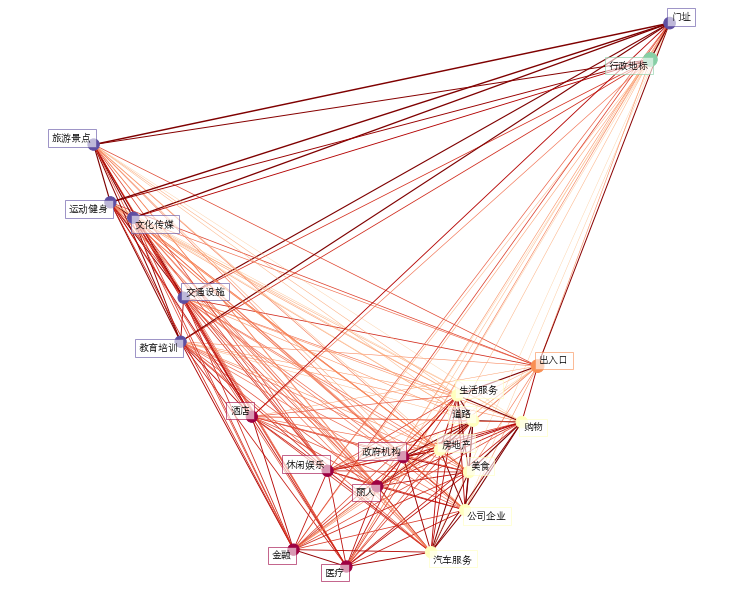

In [188]:
#D-执行独立性检验
batchClustering_DBSCAN.poi_chi_2Test()
#E-POI一级行业分类的业态结构
batchClustering_DBSCAN.POI_structure()

#### 1.3.2 曲线拐点与关键层级
调入存储有聚类信息的.shp文件。

In [190]:
import geopandas as gpd
import util

path_root=r'./data/poi_clustering'
poi_clustering_fp=os.path.join(save_path,'poi_clustering_pred.shp')
poi_clustering=gpd.read_file(poi_clustering_fp)

util.print_html(poi_clustering)

,lat,lon,20_POI,30_POI,40_POI,50_POI,60_POI,70_POI,80_POI,90_POI,100_POI,110_POI,120_POI,130_POI,140_POI,150_POI,160_POI,170_POI,180_POI,190_POI,200_POI,210_POI,220_POI,230_POI,240_POI,250_POI,260_POI,270_POI,280_POI,290_POI,300_POI,310_POI,320_POI,330_POI,340_POI,350_POI,360_POI,370_POI,380_POI,390_POI,400_POI,410_POI,420_POI,430_POI,440_POI,450_POI,460_POI,470_POI,480_POI,490_POI,500_POI,510_POI,geometry
0,34.113672,108.614730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (108.61473 34.11367)
1,34.157196,108.597683,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,POINT (108.59768 34.15720)
2,34.106033,108.630919,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (108.63092 34.10603)
3,34.122130,108.615176,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (108.61518 34.12213)
4,34.115677,108.659891,3,3,3,3,3,2,2,2,2,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (108.65989 34.11568)


* 关键层级一：自身具有明显特征的生活圈层级

POI独立点（异常值），即不满足层级的聚类距离，相对比较独立的点，计算各层级独立点总和的曲线拐点，其值为120m。进一步验证和确定120m距离下城市生活圈空间分布的特殊性，对照百度地图信息，标注面积大于40公顷的组团83个(方法略)。在该距离下聚类所团聚的组团可以清晰的反映各个组团因为城市功能需求而聚合的内在成因，例如以高校聚集区为特征的团聚，包括西南二环、东南二环、长安区北、长安区南、长安区西、长安南路、大明宫、雁塔北路、临潼、灞桥区等；部分高校较为独立，自身与周边社区形成组团例如西藏民族大学、陕西工业职业技术学院等；以区、县镇、乡为特征的团聚，例如鄠邑区、灞桥区、高陵区、三原县、蓝田县、大王镇、新丰镇、斗门镇、东风村、北辰村、东三爻村等；以及以机场、火车站、历史遗址等景点、电子城、批发市场、建材市场等团聚的组团。因为120m距离聚类城市层级的特征可以很好按照区域特点团聚形成生活圈，因此可以为城市街区的研究提供可以参照的研究边界，避免单纯物理地块的划分。

曲线拐点（凸）： 120
曲线拐点（凹）： 120


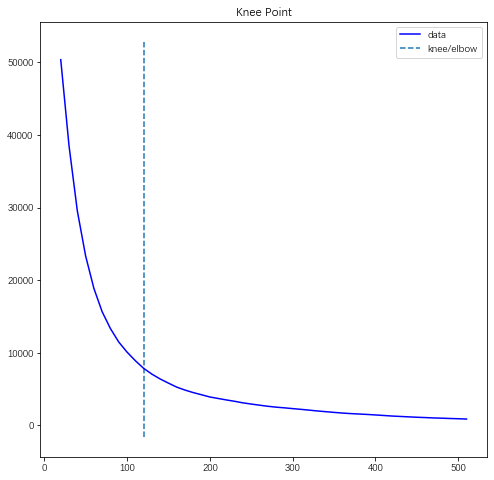

In [191]:
from data_generator import DataGenerator
from knee_locator import KneeLocator

poi_columns=list(poi_clustering.columns)[2:-1]
poi_outlier_count=[(poi_clustering[field]==-1).sum() for field in  poi_columns]

def kneed_lineGraph(x,y):
    import matplotlib.pyplot as plt
    '''
    function - 绘制折线图，及其拐点。需调用kneed库的KneeLocator，及DataGenerator文件
    
    Paras:
    x - 横坐标，用于横轴标签
    y - 纵坐标，用于计算拐点    
    '''
    #如果调整图表样式，需调整knee_locator文件中的plot_knee（）函数相关参数
    kneedle=KneeLocator(x, y, curve='convex', direction='decreasing')
    print('曲线拐点（凸）：',round(kneedle.knee, 3))
    print('曲线拐点（凹）：',round(kneedle.elbow, 3))
    kneedle.plot_knee(figsize=(8,8))
    
outlier_x=[int(i.split('_')[0]) for i in poi_columns] 
outlier_y=poi_outlier_count
kneed_lineGraph(x=outlier_x,y=outlier_y)    

Text(0.5, 1.0, 'clustering distance 120m')

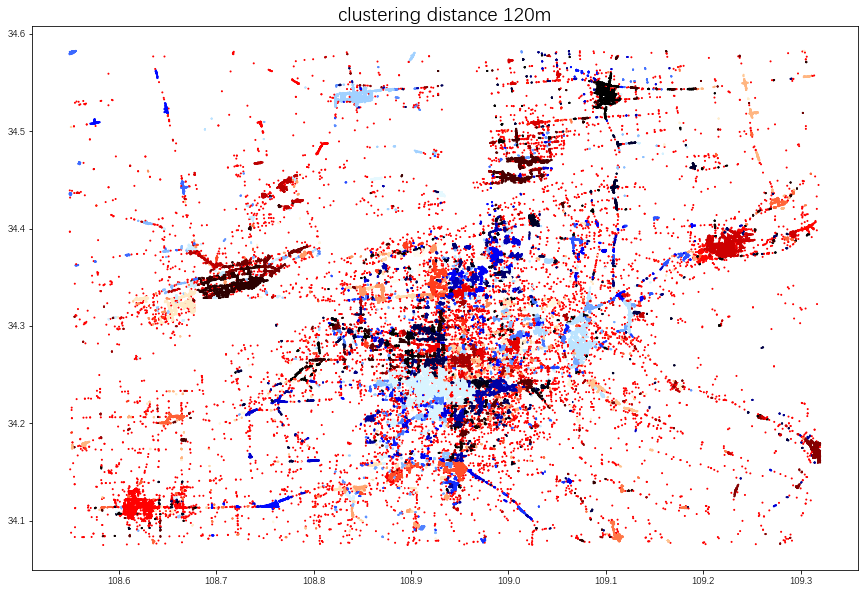

In [192]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize =(15, 10))
poi_clustering.plot(column=poi_clustering['120_POI'],markersize=1,figsize=(15,15),ax=ax,cmap='flag') 
ax.set_title("clustering distance 120m", fontsize=20)

* 关键层级二：处于相对稳定状态下的城市生活圈

计算每一层级聚类数量，绘制曲线与计算拐点值为130m。为了拐点计算移除了聚类距离20m的层级，因为该层级的聚类数量小于30m层级的数量，曲线出现转折，拐点计算会出错。在连续聚类过程中，随着距离的增加，邻近的点开始集聚，形成组团的数量，即聚类总数开始逐渐减少。计算POI聚类总数变化最快的位置，即计算拟合曲线的最大曲率，其对应的距离值为130m。代表的含义为距离130m之前邻近的组团或单独的POI点较为迅速的集聚为较大的组团，而该距离之后的集聚过程则相对缓慢，各个组团之间的联系相对较弱，因此130m距离聚类下的层级是表征城市空间结构的又一个关键点。130m层级的聚类组团反映了城市社会空间结构相对稳定的基本格局。在分布特点上呈现大集聚、小分散的格局。

关键层级一和二非常的接近，是否能够说明独立点的减少趋势与聚类总数变化趋势保持一致？

曲线拐点（凸）： 130
曲线拐点（凹）： 130


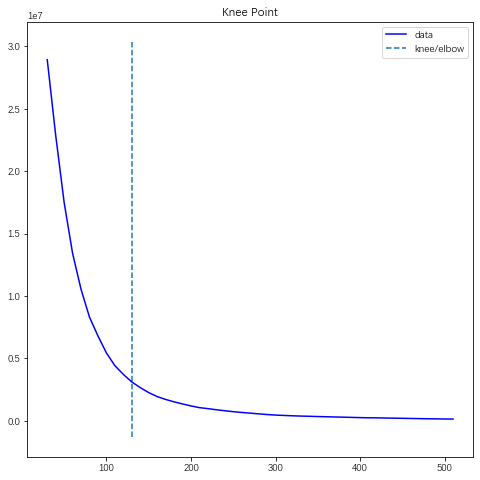

In [194]:
import numpy as np
poi_cluster_count=[np.unique(poi_clustering[field]).sum() for field in  poi_columns]

cutoff=1
cluster_x=[int(i.split('_')[0]) for i in poi_columns][cutoff:]
cluster_y=poi_cluster_count[cutoff:]
kneed_lineGraph(x=cluster_x,y=cluster_y)   

* 关键层级三：城市最大生活圈的层级与边缘

城市发展边缘的界定是城市研究的重要内容之一，是确定未来城市增长边界的重要依据，基于POI的城市社会空间边缘的确定则反映了未来城市增长的核心驱动力所在。对POI所反映的城市边缘的界定由每一层级最大簇类确定（最大频数），各层级最大簇类的变化反映了簇类边缘扩张的程度，由下述图表可以初步判断出有5个较大的跳变点，即在每一个跳变点之前的层级都是在缓步增加，逐步扩展各自的簇（生活圈），到跳变点位置发生了较大的融合，即融合前后的生活圈范围发生了较大的变化，这个变化的区域对城市的发展研究具有重要意义，是分析生活圈扩张或者隔断原因的关键点。

findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans.


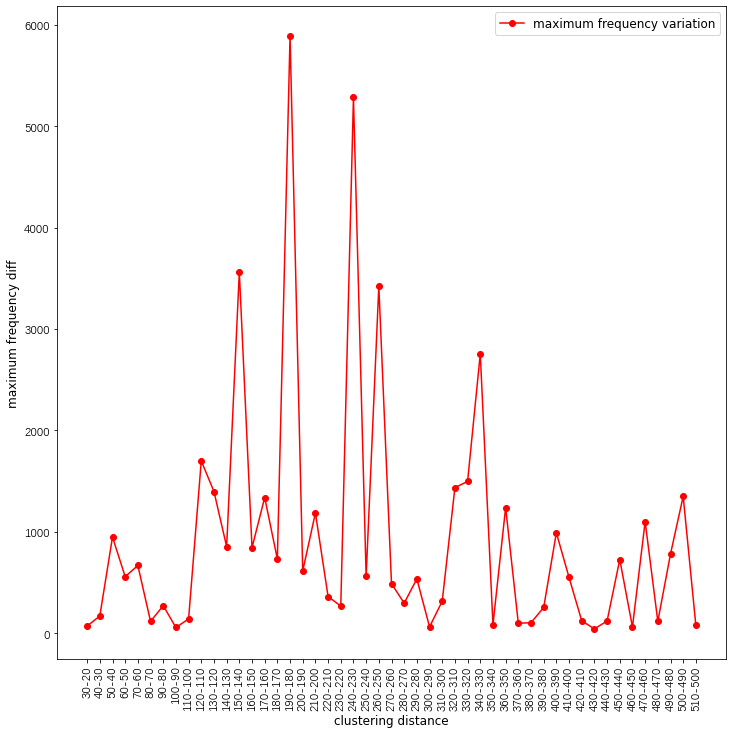

In [260]:
poi_frequency=[poi_clustering[field].value_counts().drop(index=-1) for field in  poi_columns]    #.drop(index=-1)
poi_frequency_max=[i.max() for i in poi_frequency]
poi_frequency_difference=[poi_frequency_max[i+1]-poi_frequency_max[i] for i in range(len(poi_frequency_max)-1)]

x_clusteringDistance=[int(i.split('_')[0]) for i in poi_columns]
x_clusteringDistance_diff=['%s-%s'%(x_clusteringDistance[i+1],x_clusteringDistance[i]) for i in range(len(x_clusteringDistance)-1)]

import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['DengXian'] #解决中文字符乱码问题 #设置图表文字样式
font={'family' : 'STXihei',
      'weight' : 'normal',
      'size'   : 12,}
             
plt.figure(figsize=(12, 12))
plt.plot(x_clusteringDistance_diff,poi_frequency_difference,'ro-',label="maximum frequency variation")
plt.xlabel('clustering distance',font)
plt.ylabel('maximum frequency diff',font)
plt.tick_params(labelsize=12)
plt.legend(prop=font)       
plt.xticks(rotation=90)
plt.show()

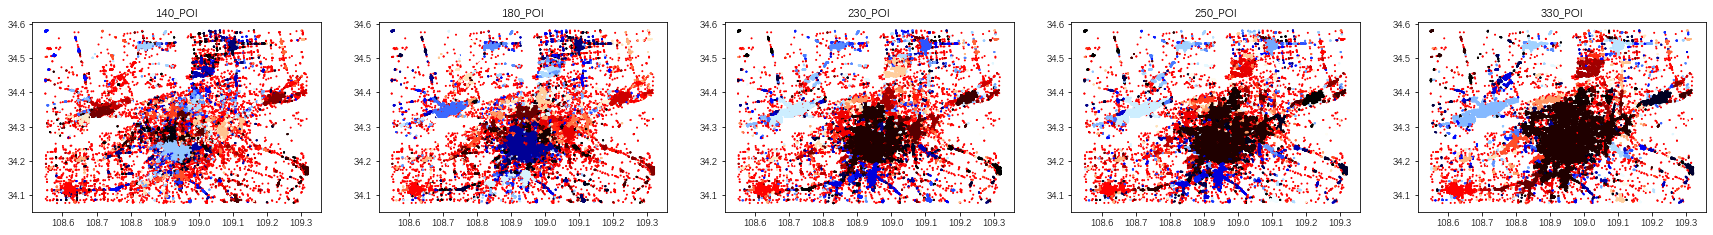

In [271]:
fig, axs=plt.subplots(1,5,figsize =(30, 15))
poiCluster_selections=['140_POI','180_POI','230_POI','250_POI','330_POI']
i=0
for field in poiCluster_selections:    
    poi_clustering.plot(column=poi_clustering[field],markersize=1,ax=axs[i],cmap='flag') 
    axs[i].set(title=field)
    i+=1

#### 1.3.3 业态结构图表拼合，生活圈的业态结构空间变化特征。
在POI空间结构分析计算中，对于POI业态结构的图表单独保存在文件夹中，在论文写作过程中通常需要将其拼合成一张大图用作论文的图表说明。下述定义的类包含按照图像文件名中的数字排序文件，读取和压缩图像为数组格式，建立文件夹，拼合图像与显示，以及保存图像等功能。

<>:48: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:101: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:48: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:101: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-25-625a9a600d36>:48: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if (img_trans.shape[0] is not 3):
<ipython-input-25-625a9a600d36>:101: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if (img.shape[2] is not 3):


File exists!


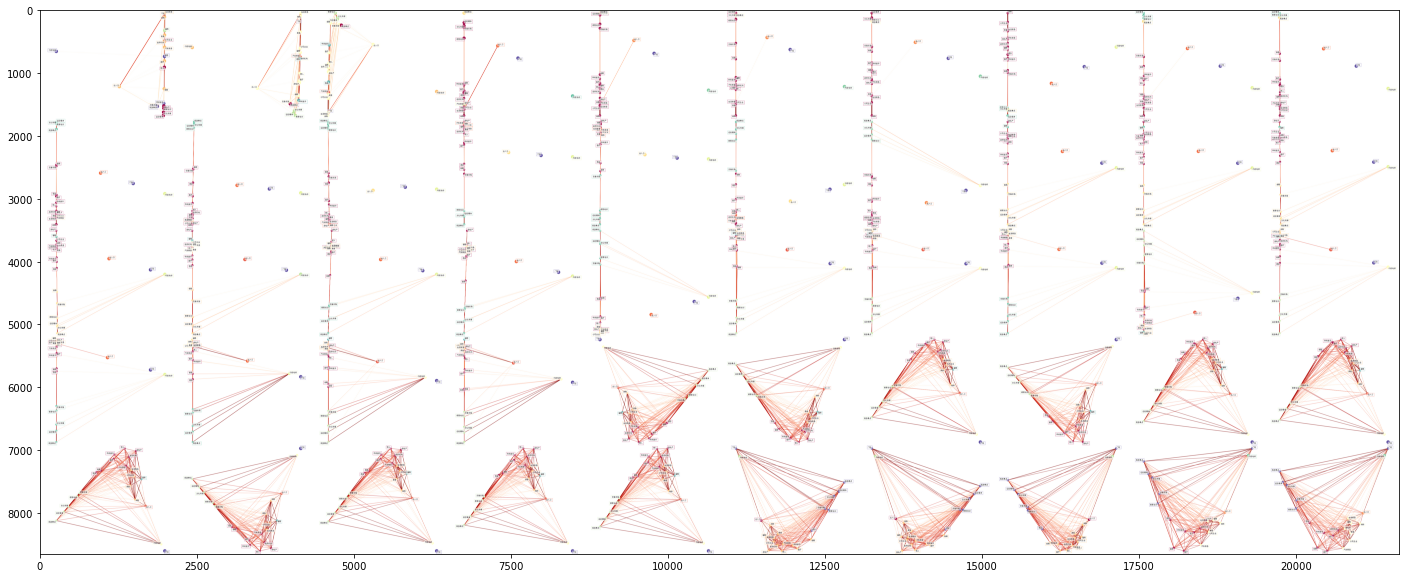

In [25]:
class combine_pics:
    def __init__(self,save_path,file_path,n_cols,scale,space=1,pad_val=255,figsize=(20,10)):
        import os,math
        self.save_path=save_path
        self.file_path=file_path        
        self.scale=scale
        self.n_cols=n_cols
        self.n_rows=math.ceil(len(os.listdir(self.file_path))/self.n_cols) 
        self.scale=space
        self.pad_val=pad_val
        self.space=space
        self.figsize=figsize
           
    def file_sorting(self):      
        import re,math,os
        '''
        function - 方法用于返回指定的文件夹包含的文件或文件夹的名字的列表，按字母-数字顺序。因此数据文件内不要包含子文件夹，否则该文件夹名称也会被读取。文件名的格式为：'xx_100_xx.extension'
        '''
        dirs_files=os.listdir(self.file_path)
        dirs_files.sort()
        pattern=re.compile(r'[_](.*?)[_]', re.S) #re.compile(r'[_](.*?)[.]', re.S)
        fn_numExtraction=[(int(re.findall(pattern, fName)[0]),fName) for fName in dirs_files]
        #提取文件名中的数字，即聚类距离。并对应文件名
        fn_sort=sorted(fn_numExtraction) 
        fn_sorted=[i[1] for i in fn_sort]
        image_names=[] #存储的为图片的路径名
        for dir_file in fn_sorted:
            image_path=os.path.join(self.file_path, dir_file)
            if image_path.endswith('.png'):
                image_names.append(image_path)               
        q_imgs_paths=image_names[0:self.n_rows*self.n_cols] #保证提取的图片数量与所配置的n_rows*n_cols数量同    
        return q_imgs_paths
    
    def read_compress_imgs(self,imgs_fp):
        from PIL import Image
        import numpy as np
        '''
        function - 读取与压缩图片
        
        Paras:
        imgs_fp - 图像路径列表
        '''
        imgs=[] #存储的为读取的图片数据
        for img_fp in imgs_fp:
            img_array=Image.open(img_fp.rstrip())            
            img_resize=img_array.resize([int(self.scale * s) for s in img_array.size] ) #传入图像的数组，调整图片大小 
            img_trans=np.asarray(img_resize).transpose(2, 0, 1) #转置
            if (img_trans.shape[0] is not 3):
                img_trans=img_trans[0:3,:,:]
            imgs.append(img_trans)
            
        return imgs
    
    def make_dir(self):
        import os
        '''
        function - 建立文件夹，用于存储拼合的图片
        '''
        savefig_root=os.path.join(self.save_path,'imgs_combination')
        if os.path.exists(savefig_root):
            print("File exists!")
        else:
            os.makedirs(savefig_root)     
        return savefig_root
    
    def imgs_combination(self,imgs):
        import numpy as np
        import matplotlib.pyplot as plt
        import matplotlib.image as mpimg
        '''
        function - 拼合图片
        '''
        #assert 断言是声明语句真假的布尔判断，如果值为真则执行程序，否则终止程序，避免运行过程中程序崩溃
        assert (imgs[0].ndim == 3) and (imgs[0].shape[0] == 3)
        assert len(imgs) <= self.n_rows * self.n_cols
        h, w=imgs[0].shape[1:]
        H=h * self.n_rows + self.space * (self.n_rows - 1)
        W=w * self.n_cols + self.space * (self.n_cols - 1)
        if isinstance(self.pad_val, np.ndarray): #isinstance（object，type）用于判断一个对象是否是一个已知类型
            self.pad_val=self.pad_val.flatten()[:, np.newaxis, np.newaxis]
        ret_img=(np.ones([3, H, W]) * self.pad_val).astype(imgs[0].dtype)
        for n, img in enumerate(imgs):
            r=n // self.n_cols
            c=n % self.n_cols
            h1=r * (h + self.space)
            h2=r * (h + self.space) + h
            w1=c * (w + self.space)
            w2=c * (w + self.space) + w
            ret_img[:, h1:h2, w1:w2] = img
        plt.figure(figsize=self.figsize)
        plt.imshow(ret_img.transpose(1,2,0))
        
        return ret_img
    
    def image_save(self,img,savefig_root):
        from PIL import Image
        import os
        '''
        function -保存图像
        '''
        if (img.shape[2] is not 3):
            img=img.transpose(1,2,0)
        Image.fromarray(img).save(os.path.join(savefig_root,'img_combination.jpg')) 
        
poiStructure_fp=r'./data/poi_clustering/POI_structure'
poiStructure_savePath=r'./data/poi_clustering'     
n_cols=10
scale=0.5
space=3
pad_val=255
figsize=(30,10)
combinePics=combine_pics(poiStructure_savePath,poiStructure_fp,n_cols,scale,space,pad_val,figsize)
q_imgs_paths=combinePics.file_sorting()
imgs_compressed=combinePics.read_compress_imgs(q_imgs_paths)
savefig_root=combinePics.make_dir()
ret_img=combinePics.imgs_combination(imgs_compressed,)
combinePics.image_save(ret_img,savefig_root)

#### 1.3.4 信息熵和均衡度分析